In [111]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [112]:
dataset=pd.read_csv('movie_metadata.csv')

In [113]:
dataset.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


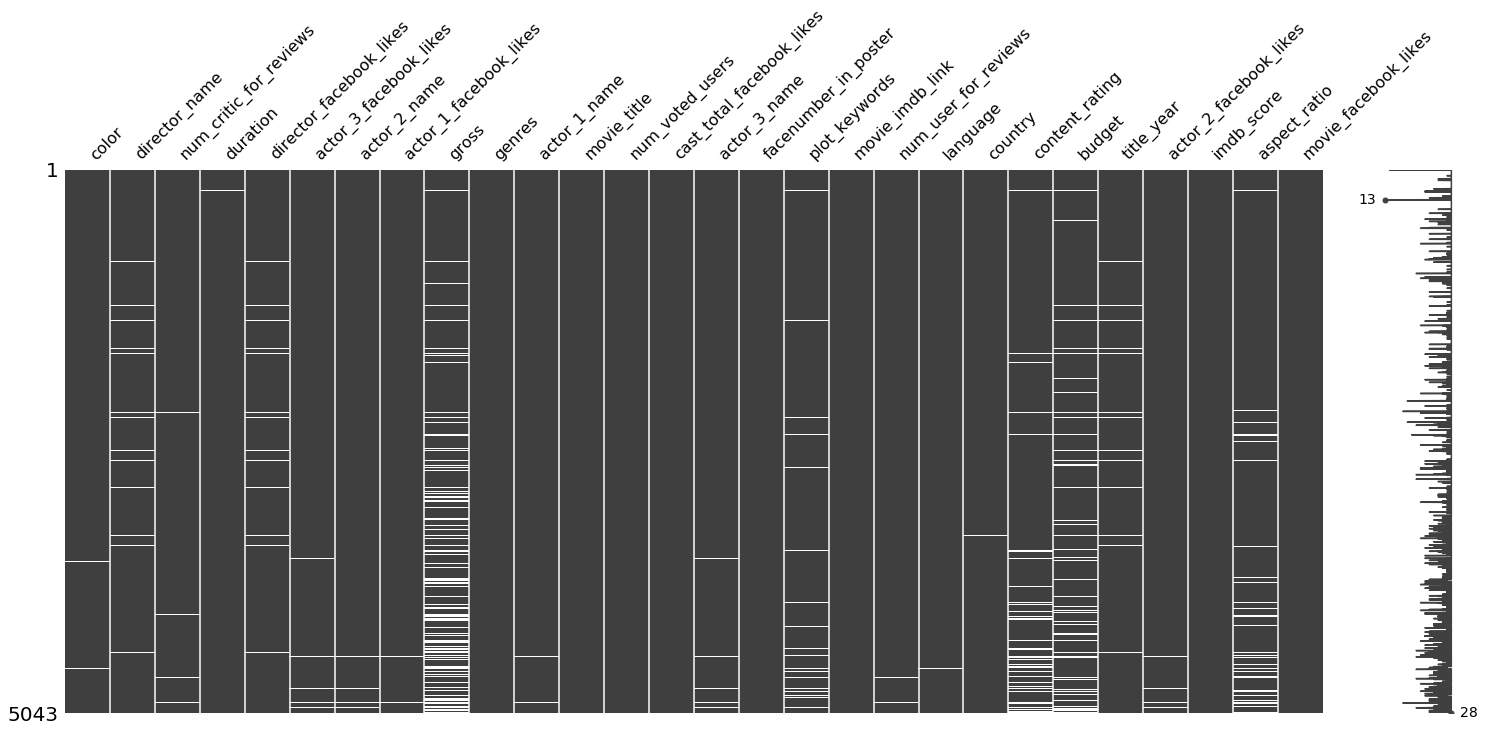

In [114]:
import missingno
missingno.matrix(dataset)

In [115]:
dataset.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [116]:
dataset.dtypes
lis=['color','actor_1_name','director_name','language','country','director_facebook_likes','actor_3_facebook_likes','actor_2_name','actor_1_facebook_likes','gross','cast_total_facebook_likes','actor_3_name','movie_imdb_link','actor_2_facebook_likes','movie_facebook_likes']
dataset.drop(lis,inplace=True,axis=1)

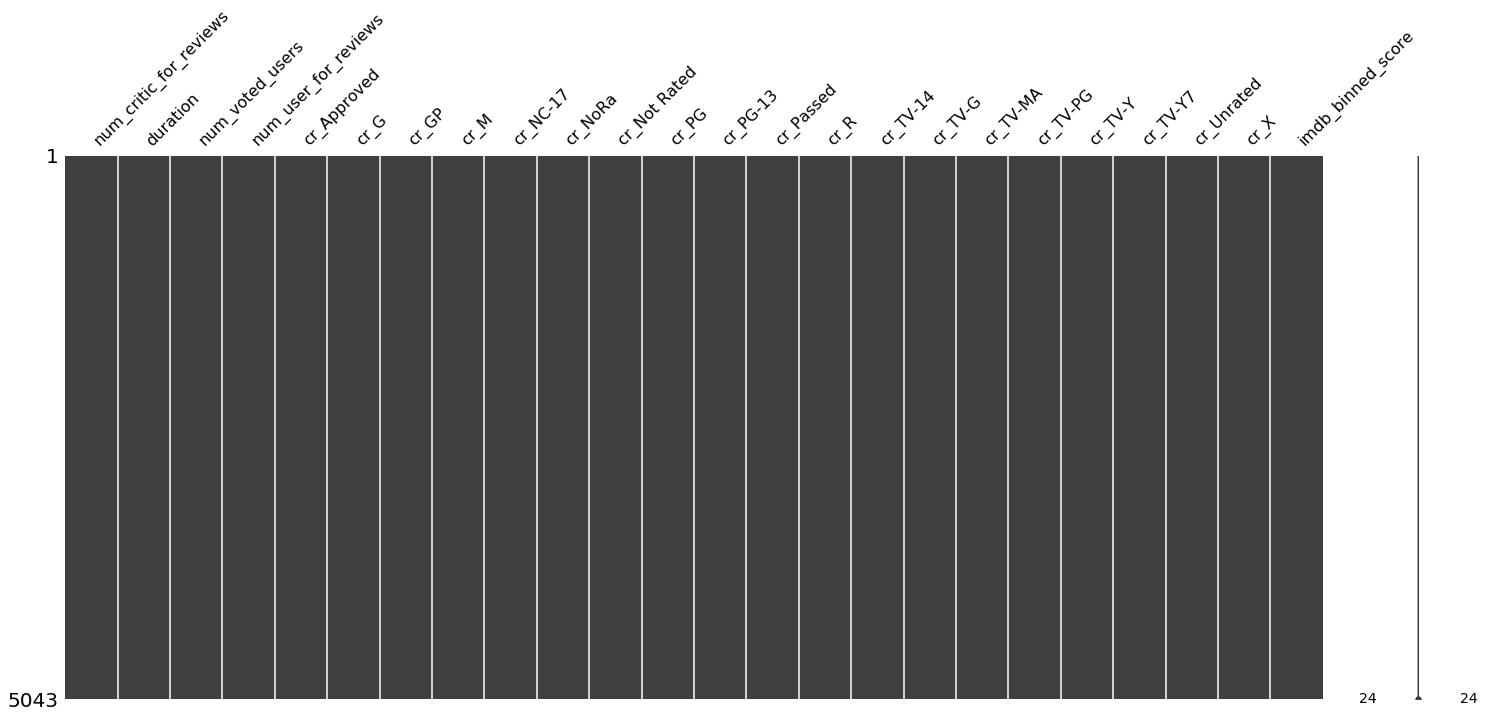

In [138]:
#dataset.drop(['title_year'],inplace=True,axis=1)
missingno.matrix(dataset)

In [118]:
dataset.aspect_ratio.isna().value_counts()

False    4714
True      329
Name: aspect_ratio, dtype: int64

In [119]:
#dataset.country.value_counts()
a=dataset['num_critic_for_reviews'].mode()
dataset['num_critic_for_reviews'].fillna(float(a),inplace=True)
dataset['duration'].fillna(dataset['duration'].mean(),inplace=True)

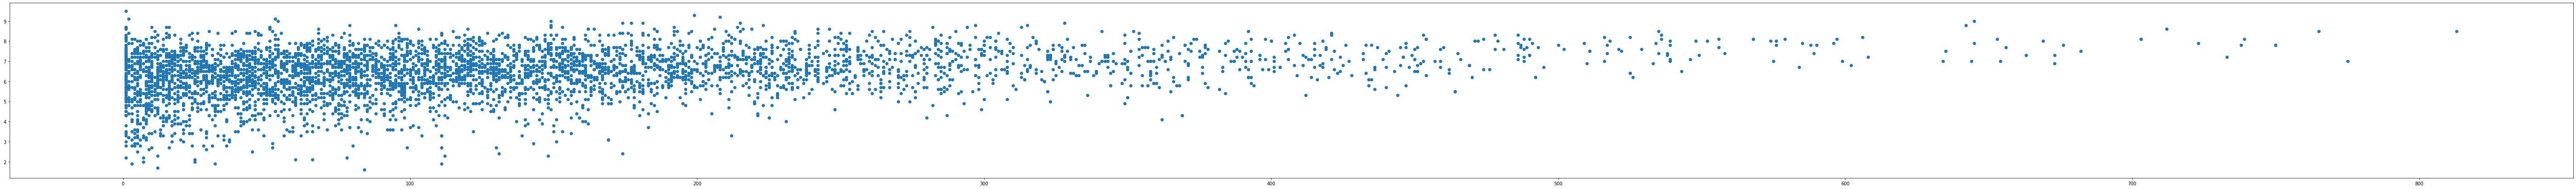

In [120]:
plt.figure(figsize=(100,7))
#sns.boxplot(x='country',y='imdb_score',data=dataset,palette='winter')
plt.scatter(dataset['num_critic_for_reviews'],dataset['imdb_score'])
#as critic reviews increases imdb ratings score improves

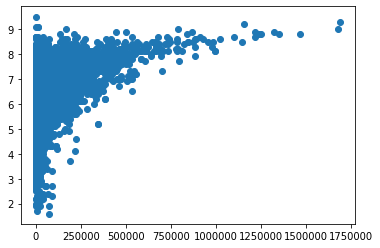

In [121]:
plt.scatter(dataset['num_voted_users'],dataset['imdb_score'])
#as voted users increases imdb ratings score improves

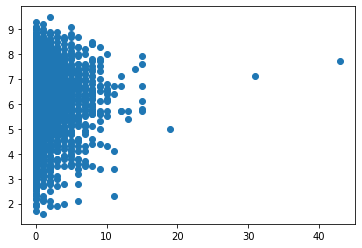

In [122]:
plt.scatter(dataset['facenumber_in_poster'],dataset['imdb_score'])
#hardly any data to confirm any relation between face number and imdb rating

In [123]:
dataset.drop('facenumber_in_poster',inplace=True,axis=1)

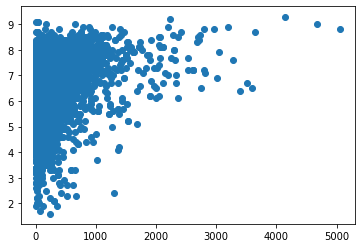

In [124]:
plt.scatter(dataset['num_user_for_reviews'],dataset['imdb_score'])

In [125]:
b=dataset['num_user_for_reviews'].mode()
dataset['num_user_for_reviews'].fillna(float(b),inplace=True)
dataset['content_rating'].fillna('NoRa',inplace=True)

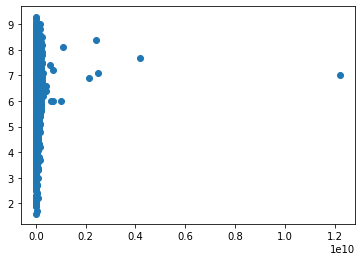

In [126]:
#budget dropped as there are many null values in the column
plt.scatter(dataset['budget'],dataset['imdb_score'])
dataset.drop('budget',inplace=True,axis=1)

In [127]:
dataset['title_year'].fillna(dataset['title_year'].median,inplace=True)

In [128]:
dataset['aspect_ratio'].fillna(dataset['aspect_ratio'].mode,inplace=True)

In [129]:
dataset.drop(['plot_keywords'],inplace=True,axis=1)

In [132]:
# dataset.drop(['genres'],inplace=True,axis=1)
# dataset.drop(['movie_title'],inplace=True,axis=1)
# dataset.drop(['title_year'],inplace=True,axis=1)
# dataset.drop(['aspect_ratio'],inplace=True,axis=1)
dataset.drop(['content_rating'],inplace=True,axis=1)



In [131]:
dataset = pd.concat([dataset,pd.get_dummies(dataset['content_rating'], prefix='cr')],axis=1)

In [133]:
dataset.dtypes

num_critic_for_reviews    float64
duration                  float64
num_voted_users             int64
num_user_for_reviews      float64
imdb_score                float64
cr_Approved                 uint8
cr_G                        uint8
cr_GP                       uint8
cr_M                        uint8
cr_NC-17                    uint8
cr_NoRa                     uint8
cr_Not Rated                uint8
cr_PG                       uint8
cr_PG-13                    uint8
cr_Passed                   uint8
cr_R                        uint8
cr_TV-14                    uint8
cr_TV-G                     uint8
cr_TV-MA                    uint8
cr_TV-PG                    uint8
cr_TV-Y                     uint8
cr_TV-Y7                    uint8
cr_Unrated                  uint8
cr_X                        uint8
dtype: object

In [134]:
dataset["imdb_binned_score"]=pd.cut(dataset['imdb_score'], bins=[0,4,6,8,10], right=True, labels=False)+1

In [135]:
dataset.drop('imdb_score',axis=1,inplace=True)

In [139]:
from sklearn.model_selection import train_test_split

In [140]:
X=dataset.iloc[:,:-1].values

In [142]:
y=dataset.iloc[:,-1].values

In [143]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [144]:
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)


In [153]:
from sklearn.neighbors import KNeighborsClassifier

In [164]:
cnn=KNeighborsClassifier(n_neighbors=20)

In [165]:
cnn.fit(X_train, np.ravel(y_train,order='C'))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                     weights='uniform')

In [166]:
y_pred=cnn.predict(X_test)

In [167]:
from sklearn import metrics

In [168]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.6689791873141725
